# Exercise 4
In this exercise you will get some hands on experience with applying SVM and Random Forests algorithms for classification problems. For understanding a bit better the theoretical part of SVM, you will practice a concrete example of using a kernel to get a linear separability in a higher dimension. You will then apply a Decision Tree classsifier and random forest on the MNIST hand written digits dataset that we already saw.

As a bonus you are invited to look at an interesting (and relatively easy to play with due to small size data files) Kaggle competition --- "welcome to the real world" ;)

## SVM with a polynomial kernel

You are given data $x=(x_1,x_2)\in\mathbb{R}^2$ that is known to be labeled using the function
$$
y = \text{sign}(3x_1^2 - x_2 - 2)
$$


### Question 1
<b>Use the polynomial transformation into a higher dimensional space, with a polynomial degree 2, and write down a separating hyperplane **in that higher dimension** such that all the samples will be classified correctly. That is, find $w$ and $b$ such that
$$
\forall(x,y):\,\,\,\text{sign}(w^T\phi(x)+b)=y
$$
where 
$$
\phi(x)=\phi(x_1,x_2)=(1, x_1^2, x_2^2, \sqrt{2}x_1, \sqrt{2}x_2, \sqrt{2}x_1x_2)
$$
</b>

**Answer:**


for b = 0  ,  and  $
w^T =[-2, 3, 0, 0, -\frac{1}{\sqrt2}, 0]
$
<br>$
\phi(x)=\phi(x_1,x_2)=(1*(-2) + x_1^2*3 + x_2^2*0 + \sqrt{2}x_1*0 + \sqrt{2}x_2*(-\frac{1}{\sqrt2}) +  \sqrt{2}x_1x_2*0)
$

In [1]:
import warnings
warnings.simplefilter(action='ignore')
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import datasets
import sklearn.metrics
from sklearn import metrics
from sklearn import tree

### Question 2
<b>Using the result above, we know there is a linear separating hyperplane in the 2-degree polynomial higher dimension space. That means we should be able to use SVM with a polynomial kernel of degree 2 to perfectly separate the classes.



</b>

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def true_boundary(x1, x2):
  return 3*x1**2 - x2 - 2

def generate_data(m, seed=None):
  # if seed is not None, this function will always generate the same data
  np.random.seed(seed)
  X1 = np.random.uniform(low=-2.0, high=2.0, size=(m,1))
  X2 = np.random.uniform(low=-3.0, high=9.0, size=(m,1))
  X = np.hstack((X1, X2))
  y = np.sign(true_boundary(X[:,0], X[:,1]))
  y[y==0] = 1
  return X, y

def plot_labeled_data(X, y):
  plt.scatter(X[(y==1),0], X[(y==1),1], c='r')
  plt.scatter(X[(y==-1),0], X[(y==-1),1], c='b')  
  plt.xlim([-2, 2]);
  plt.ylim([-3, 9]);
  plt.plot(np.linspace(-2,2,100), true_boundary(np.linspace(-2,2,100), np.zeros(100)), linewidth=2, c='k');


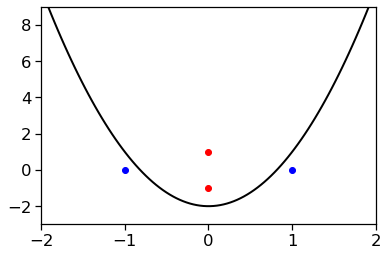

In [3]:
# the sample set
X = np.array([[-1,  0],
              [ 1,  0],
              [ 0, -1],
              [ 0,  1]])

y = np.array([-1,
              -1,
               1,
               1])

plot_labeled_data(X, y)

<b>- Apply such SVM on the 4 points sample set provided below (make sure to set `coef0=1`)</b>

In [4]:
model = svm.SVC(kernel='poly',degree=2,coef0=1,C=100)
model.fit(X, y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<b>- Draw the resulting separarting hyperplane and show the support vectors in the original 2D space.</b>

In [5]:
def plot_svc_decision_function(X, y):
    
    plot_labeled_data(X, y)
    # fit the model
    model = svm.SVC(kernel='poly', coef0=1,C=100, degree=2)
    model = model.fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1,
               facecolors='none', edgecolors='g', label='support vectors')
    
    plt.legend(loc='upper center', bbox_to_anchor=(1.4, 1))
    sv = (model.n_support_)
    sv_all = len(model.support_vectors_)

    plt.title(f'The Number of all support vectors = {sv_all}');
    print(f'for each class we have {sv[0]} and {sv[1]} support vectors')

for each class we have 2 and 2 support vectors


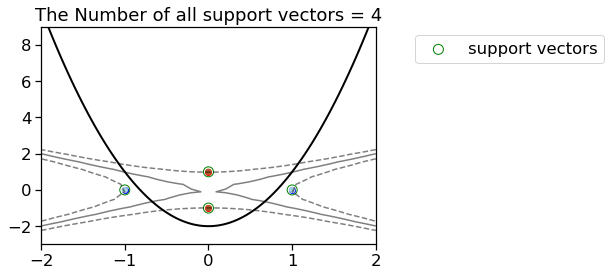

In [6]:
plot_svc_decision_function(X,y)

<b>
- Compare the results with the true function that generates that data.</b>

for each class we have 2 and 1 support vectors


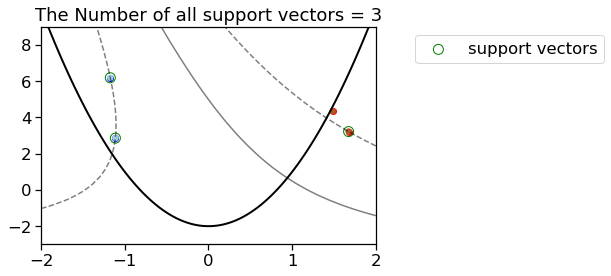

In [7]:
X,y = generate_data(4,5)
plot_svc_decision_function(X,y)


<b>
- Create a new training data set with 100 samples (use the provided function) and repeat the steps above.</b>

<b> Did your results change?</b>

Yes of cause our results changed

<b> What about 500 samples?
</b>

for each class we have 11 and 11 support vectors


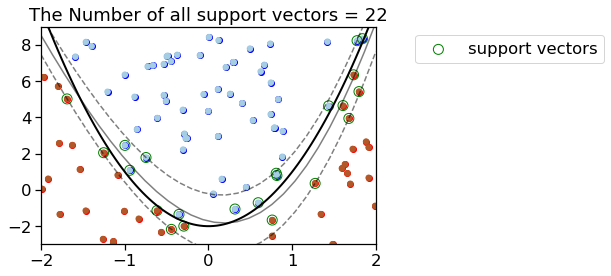

In [8]:
X,y=generate_data(100)

plot_svc_decision_function(X,y)


for each class we have 42 and 43 support vectors


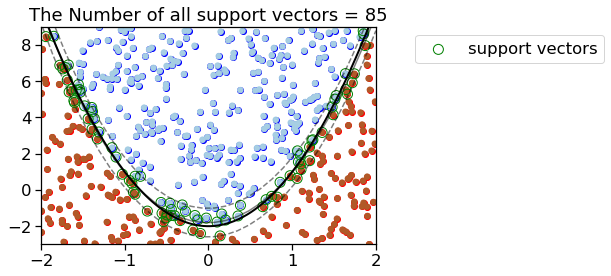

In [9]:
X,y = generate_data(500)
plot_svc_decision_function(X,y)

<b>
- How does the number of support vectors relative to the sample set size changes as you increase the sample set size?</b>

The the number of support vectors increase when we increase the sample set size in our case. 
<br>But the number of support vectors can be differen  for the same size of set, if we will rerun the code
<br> In our case we don't need a very big set to make  a correct prediction with our model

<b>  What does it mean?</b>

No relations between size of sample and number of support vectors if we will look on the same size sets
<br>Our model works well enough

<b>
- Write your conclusions.</b>

For different SVM models, support vectors may be different while the data dimension is all the same.
<br>The set of support vectors is a subset of examples. 
<br>Those are examples which are on minimal distance from the hyper plane which separates positive from negative examples.

## Question 3: Using Decision Tree and Random Forest for Digits Classification
**Remember the MNIST dataset used in exercise 2 - you will now test the power of decision trees on this problem.
This time you are given a free hand in choosing the test and train set sizes, model parameters (such as gain function and constraints over the trees) and features (whether to use binary pixel values or the original continous gray value).**


First, we need to Load the data from dataset

In [10]:
mnist = sklearn.datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

Let's split the data 

In [11]:
X = mnist[0]
y = mnist[1]
mnist[0].shape

(70000, 784)

Now we divide our data into train and test sets, using 20% of the data for testing

In [12]:
# random forest
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size=.2, random_state=42)

In [13]:
#decision tree 
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y, test_size=.2, random_state=42)

Let's check the shape of splitting sets in %

In [14]:
print(f"For random forest\n Train set size:'{round(len(X_train_f)/len(y)*100,2)}%\nTest set size:{round(len(X_test_f)/len(y)*100,2)}%")

For random forest
 Train set size:'80.0%
Test set size:20.0%


In [15]:
print(f"For decision tree\n Train set size:'{round(len(X_train_t)/len(y)*100,2)}%\nTest set size:{round(len(X_test_t)/len(y)*100,2)}%")

For decision tree
 Train set size:'80.0%
Test set size:20.0%


<b>- Choose which model parameters you wish to optimize, explain how would you do that, and find a model which you believe would have the minimal generalization error --- do this for both a single decision tree model, and a random forest.</b>

Lets Choose a model parameters  to optimize for `RandomForestClassifier`. It will be `n_estimators`

In [16]:
accur_f=[]
f1_f=[]
k_range = np.arange(100,501,50)

In [17]:
for k in k_range:
    forest_model = RandomForestClassifier(n_estimators=k, max_depth=10)
    forest_model.fit(X_train_f, y_train_f)
    y_pred_forest = forest_model.predict(X_test_f)
    print(f'to not boring untill waiting\nk = {k}')
    forest_accur = accuracy_score(y_test_f, y_pred_forest)
    print(f'Accurecy: {forest_accur}')
    forest_test_score = f1_score(y_test_f, y_pred_forest, average='macro')
    print(f'f1_score: {forest_test_score}')

    accur_f.append(forest_accur)
    f1_f.append(forest_test_score)  

to not boring untill waiting
k = 100
Accurecy: 0.9458571428571428
f1_score: 0.9456467446397179
to not boring untill waiting
k = 150
Accurecy: 0.9447857142857143
f1_score: 0.9445334644077302
to not boring untill waiting
k = 200
Accurecy: 0.9461428571428572
f1_score: 0.9459448179709078
to not boring untill waiting
k = 250
Accurecy: 0.9462857142857143
f1_score: 0.9461103212060994
to not boring untill waiting
k = 300
Accurecy: 0.9465
f1_score: 0.9463576471321831
to not boring untill waiting
k = 350
Accurecy: 0.9445714285714286
f1_score: 0.9443197781394931
to not boring untill waiting
k = 400
Accurecy: 0.9462857142857143
f1_score: 0.9461110491816844
to not boring untill waiting
k = 450
Accurecy: 0.947
f1_score: 0.9468395196067444
to not boring untill waiting
k = 500
Accurecy: 0.947
f1_score: 0.9468710054641873


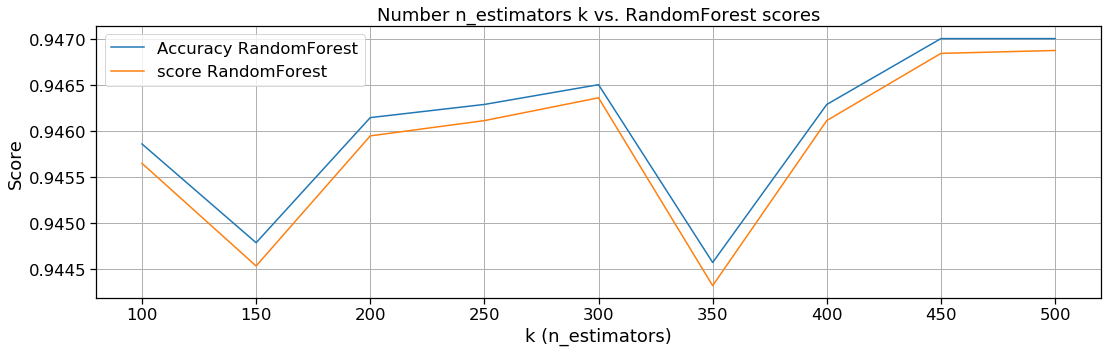

In [18]:
plt.figure(figsize = (18,5))

plt.plot(k_range, accur_f, label = 'Accuracy RandomForest')
plt.plot(k_range, f1_f, label = 'score RandomForest')

plt.xlabel('k (n_estimators)')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.xticks(k_range)
plt.title('Number n_estimators k vs. RandomForest scores');

As we can see, the best number of estimators is in the point 300: we have a good accuracy and f1 score

In [30]:
forest_model = RandomForestClassifier(n_estimators=300, max_depth=10)
forest_model.fit(X_train_f, y_train_f)
y_pred_forest = forest_model.predict(X_test_f)
forest_accur = accuracy_score(y_test_f, y_pred_forest)
forest_test_score = f1_score(y_test_f, y_pred_forest, average='macro')
print(f'Accurecy RandomForestClassifier with n_estimators=300 : {forest_accur}')    
print(f'f1_score RandomForestClassifier with n_estimators=300 : {forest_test_score}')

Accurecy RandomForestClassifier with n_estimators=300 : 0.9467142857142857
f1_score RandomForestClassifier with n_estimators=300 : 0.9465296537674719


Now let's try to find a `DecisionTreeClassifier` model which we believe would have the minimal generalization error:

this time we will check the` max_depth` parametr

In [20]:
m_range = np.arange(1,40,1)
accur_t=[]
f1_t=[]
for m in m_range:
    tree_model = DecisionTreeClassifier(max_depth=m)
    tree_model.fit(X_train_t, y_train_t)
    y_pred_tree = tree_model.predict(X_test_t)
    print(f'to not boring untill waiting\nm = {m}')

    tree_accur = accuracy_score(y_test_t, y_pred_tree)
    print(f'Accurecy: {tree_accur}')

    tree_test_f1 = f1_score(y_test_t, y_pred_tree, average='macro')
    print(f'f1_score: {tree_test_f1}')

    accur_t.append(tree_accur)
    f1_t.append(tree_test_f1)

to not boring untill waiting
m = 1
Accurecy: 0.20635714285714285
f1_score: 0.07174489517751671
to not boring untill waiting
m = 2
Accurecy: 0.33785714285714286
f1_score: 0.2127302288512558
to not boring untill waiting
m = 3
Accurecy: 0.44471428571428573
f1_score: 0.3878819009225703
to not boring untill waiting
m = 4
Accurecy: 0.5630714285714286
f1_score: 0.5374418203755629
to not boring untill waiting
m = 5
Accurecy: 0.6577142857142857
f1_score: 0.652317105258896
to not boring untill waiting
m = 6
Accurecy: 0.7295
f1_score: 0.7261834570541612
to not boring untill waiting
m = 7
Accurecy: 0.7767857142857143
f1_score: 0.7745889982446895
to not boring untill waiting
m = 8
Accurecy: 0.8092142857142857
f1_score: 0.806763000227065
to not boring untill waiting
m = 9
Accurecy: 0.8396428571428571
f1_score: 0.8377666143947884
to not boring untill waiting
m = 10
Accurecy: 0.8582142857142857
f1_score: 0.8564207333378885
to not boring untill waiting
m = 11
Accurecy: 0.8682857142857143
f1_score: 0.86

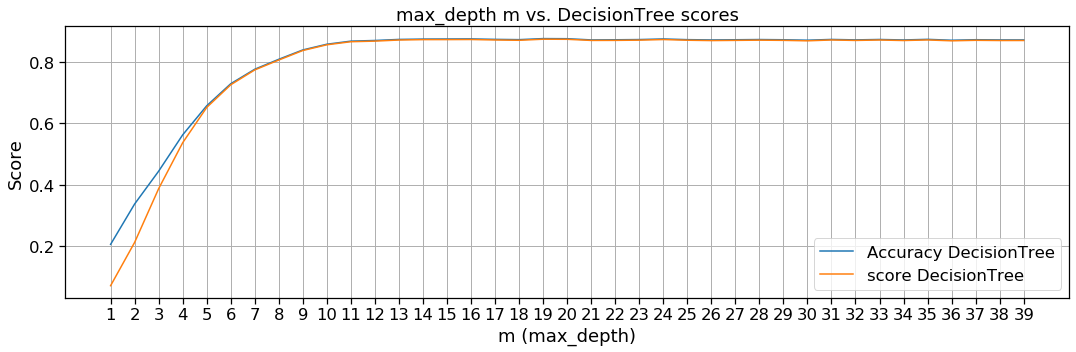

In [21]:
plt.figure(figsize = (18,5))
plt.plot(m_range, accur_t, label = 'Accuracy DecisionTree')
plt.plot(m_range, f1_t, label = 'score DecisionTree')

plt.xlabel('m (max_depth)')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.xticks(m_range)
plt.title('max_depth m vs. DecisionTree scores');

From the plot we able to see, that point 10 is a good point on the scores curve. If we will take  Both curves  at the same value, than point 10 can be our optimal max_depth, our tree won't be overfited and we woll get high accurate model

In [39]:
tree_model = DecisionTreeClassifier(max_depth=10)
tree_model.fit(X_train_t, y_train_t)
y_pred_tree = tree_model.predict(X_test_t)
tree_accur = accuracy_score(y_test_t, y_pred_tree)
tree_test_f1 = f1_score(y_test_t, y_pred_tree, average='macro')
print(f'Accurecy DecisionTreeClassifier with max_depth=10 : {tree_accur}')    
print(f'f1_score DecisionTreeClassifier with max_depth=10 : {tree_test_f1}')

Accurecy DecisionTreeClassifier with max_depth=10 : 0.8580714285714286
f1_score DecisionTreeClassifier with max_depth=10 : 0.8563324324252832


<b>- Once you are satisfied with the model parameters, plot for each of the models (a single decision tree and random forest) the importance of each of the pixels to the final decision.</b>

In [23]:
def draw_MNIST_feature_importance(model,title,X_train):
    #heatmap
    plt.figure(figsize = (18,10))
    imptnc = np.reshape(np.round(model.feature_importances_,3),(28,28))
    sns.heatmap(imptnc, annot=True, annot_kws={"size": 10}, cmap=plt.cm.cividis)
    plt.title(f'Pixel importance for `{title}` model', fontsize=25);
    
    #barplot
    plt.figure(figsize = (18,10))
    feature_importance = pd.Series(index=pd.DataFrame(X_train).columns , \
                                   data=tree_model.feature_importances_)
    feature_importance = feature_importance.sort_values()
    feature_importance.tail(20).plot.barh(fontsize=16, figsize=(14,7),color='skyblue')
    plt.grid(axis='x',which='major',color='grey', alpha=0.3)
    plt.box(on=None)
    plt.title(f'Pixel importance for `{title}` model', fontsize=25);

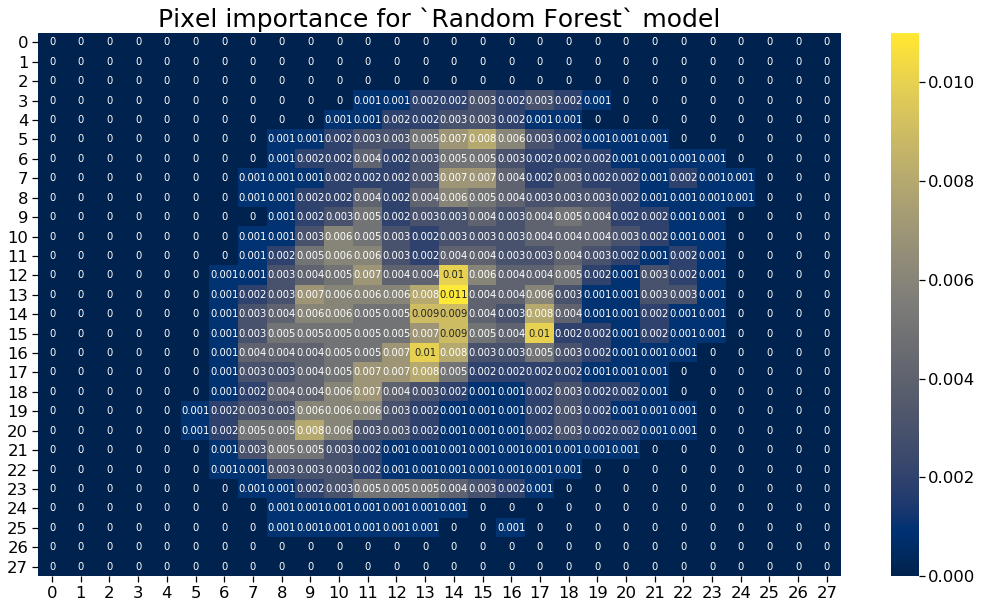

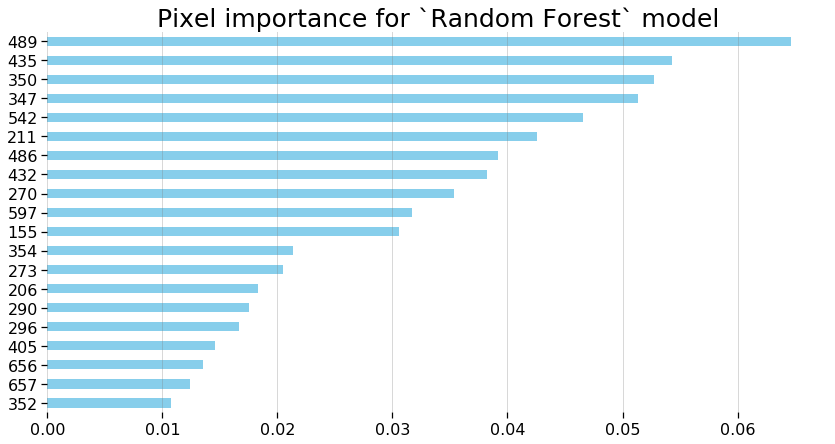

In [24]:
draw_MNIST_feature_importance(forest_model,'Random Forest',X_train_f)

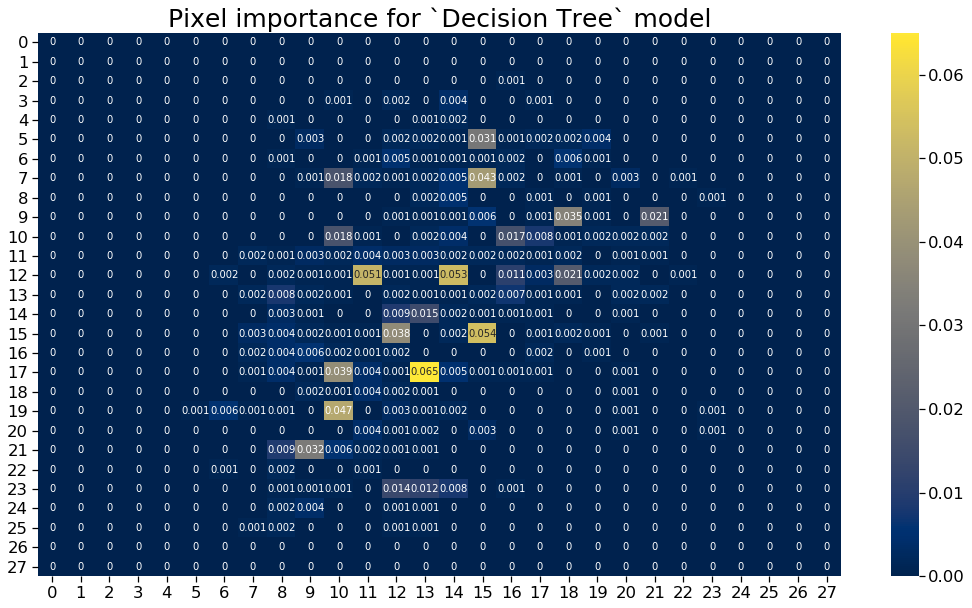

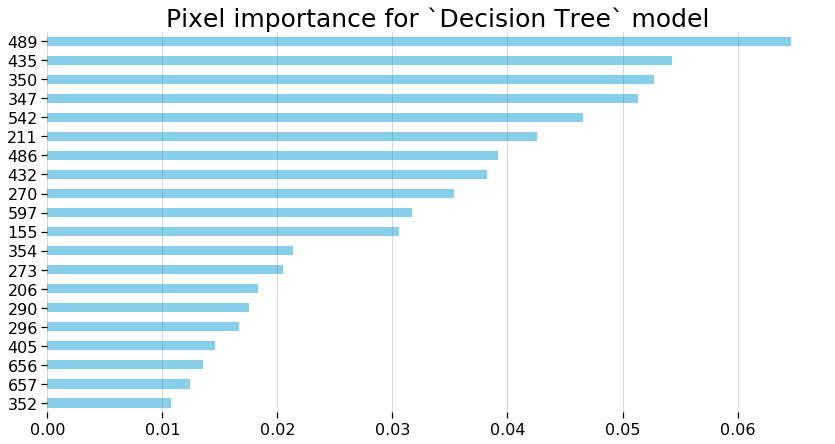

In [25]:
draw_MNIST_feature_importance(tree_model,'Decision Tree',X_train_t)

<b>-Last, estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.</b>

In [36]:
def draw_predict_proba(model,title, X_test, y_test, y_pred):
    df = pd.DataFrame(model.predict_proba(X_test))
    df['num'] = y_test
    df['num_pred'] = model.predict(X_test)
    
    #correct pred_proba into df
    df_correct = df[df.num_pred == df.num]
    proba_t = df_correct.groupby('num').mean()   
    proba_draw_correct = np.diagonal(proba_t)
    
     #not correct pred_proba into df
    df_incorrect = df[df.num_pred != df.num]
    proba_f = df_incorrect.groupby('num').mean()   
    proba_draw_incorrect = np.diagonal(proba_f)
  
    #take unique values of nums
    nums = np.unique(X_test)
    nums10 = nums[:10]
    
    #draw the bar
    plt.figure(figsize=(10,5))
    
    plt.bar(np.arange(0,10,1)-0.1, proba_draw_correct, width=0.3, color='red',
            label='correctly predicted',alpha=0.3)
    
    plt.bar(np.arange(0,10,1)+0.1, proba_draw_incorrect, width=0.3,color='blue',
            label='incorrectly predicted', alpha=0.4)
    
    plt.xticks(np.arange(0,10,1))
    plt.grid(axis='y',which='major',color='grey', alpha=0.3)
    plt.box(on=None)
    plt.legend(loc='upper center', bbox_to_anchor=(1.4, 1))
    plt.title(f'Estimation of the class assignment probabilities for {title}', fontsize=20);

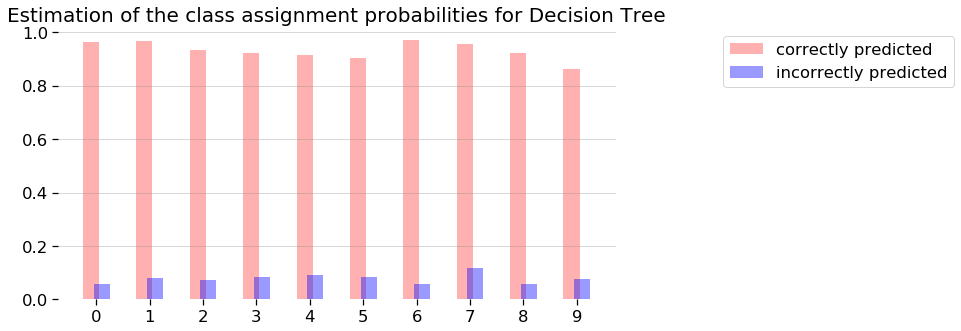

In [41]:
draw_predict_proba(tree_model,'Decision Tree', X_test_t, y_test_t, y_pred_tree)

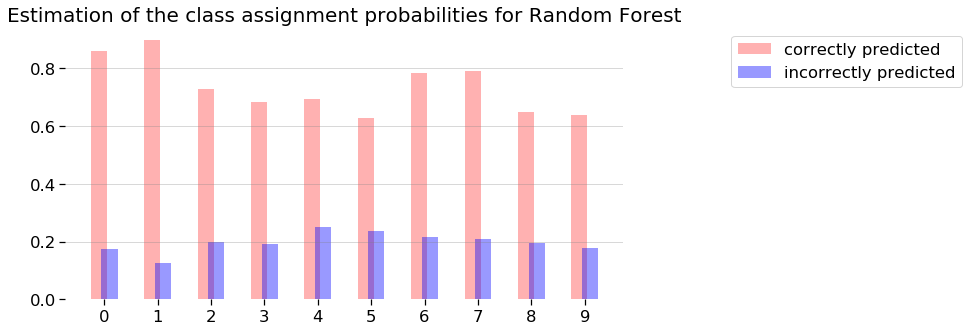

In [40]:
draw_predict_proba(forest_model,'Random Forest', X_test_f, y_test_f, y_pred_forest)

## Spooky Author Identification Kaggle Competition
The [competition](https://www.kaggle.com/c/spooky-author-identification) is over by now, but you are welcome to play with the data and see if you can get a high score.
A good place to start would be to review the public notebook [Benchmarking different Sklearn classifiers](https://www.kaggle.com/vonneumann/benchmarking-sklearn-classifiers).

## References
- https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
- https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
- https://www.analyticsvidhya.com/blog/2014/06/introduction-random-forest-simplified/